In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)  # in inches

# Ex. 1: Sunspots

In [6]:
def cov(y, k):
    mean_val = np.mean(y)
    sum = 0

    for i in range(np.size(y) - k):
        sum += (y[i] - mean_val)*(y[i+k] - mean_val)
    
    return sum / np.size(y)

def autocorrelation(y, k):
    return cov(y, k) / np.var(y)

def autocorrelation_of_given_lags(y, lags):
    out = np.empty(np.size(lags))
    for lag in range(np.size(lags)):
        out[lag] = autocorrelation(y, lags[lag])
    return out

In [15]:
# a).

# I used SoniaGPT
sunspots_data = pd.read_csv("sunspots_clean.csv")
display(sunspots_data)

,Year,Month,Fractional_Year,Monthly_Sunspot,SD,Observations,Status
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN
...,...,...,...,...,...,...,...
3267,2021,4,2021.286,24.5,6.8,1277,*
3268,2021,5,2021.371,21.2,5.4,1237,*
3269,2021,6,2021.453,25.4,5.6,1196,*
3270,2021,7,2021.538,34.4,9.1,1222,*


array([   1,    2,    3, ..., 3270, 3271, 3272])

array([ 96.7, 104.3, 116.7, ...,  25.4,  34.4,  22.4])

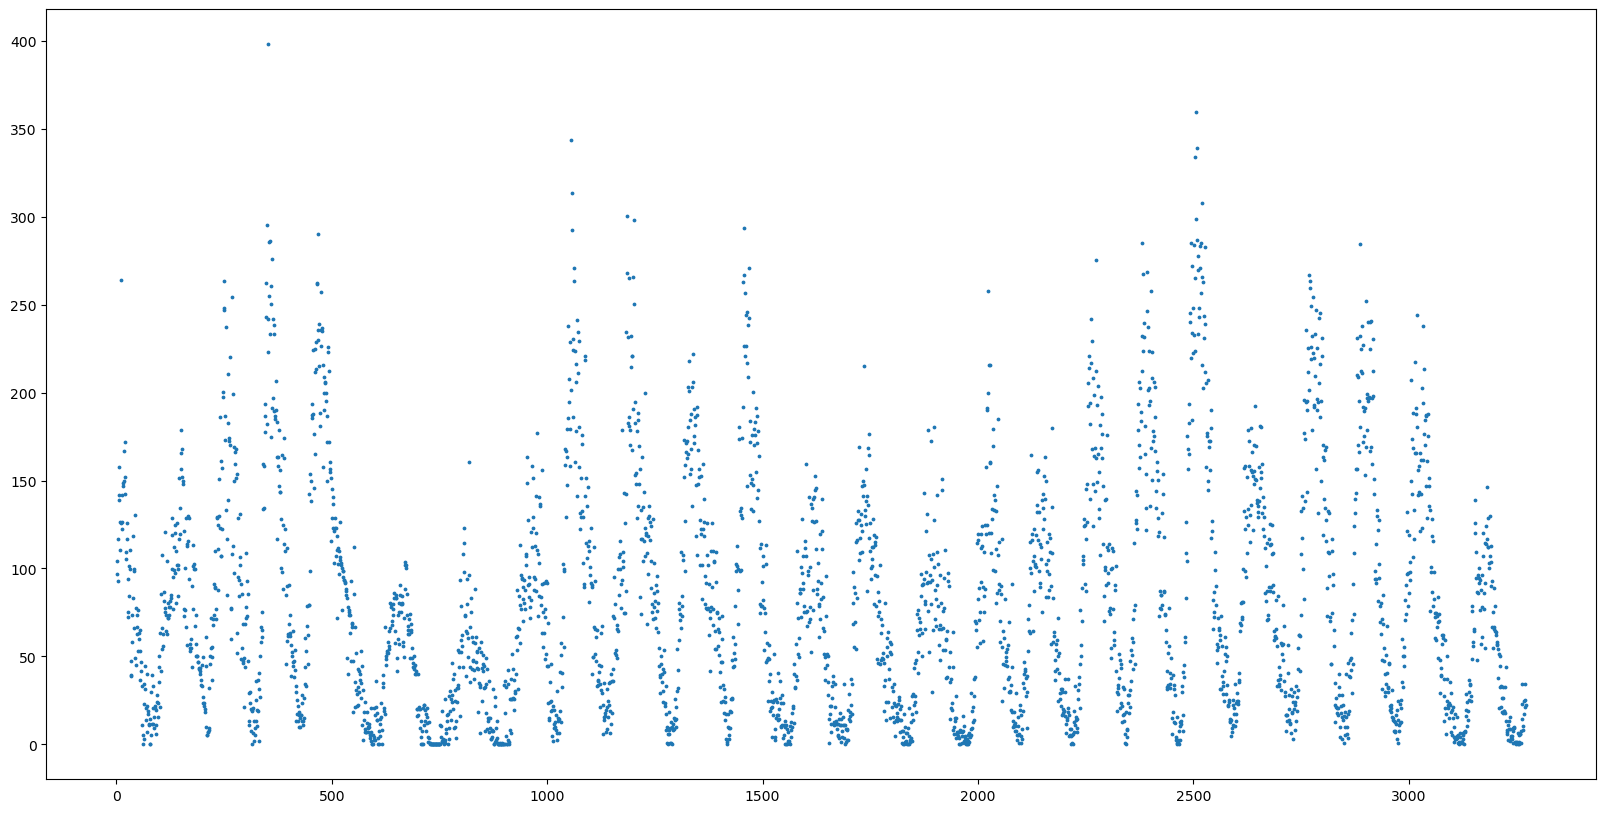

In [19]:
# b).

month_numbers = np.array(sunspots_data.index) + 1
display(month_numbers)
monthly_sunspot_amount = np.array(sunspots_data["Monthly_Sunspot"])
display(monthly_sunspot_amount)

plt.scatter(month_numbers, monthly_sunspot_amount, s=3)
plt.show()

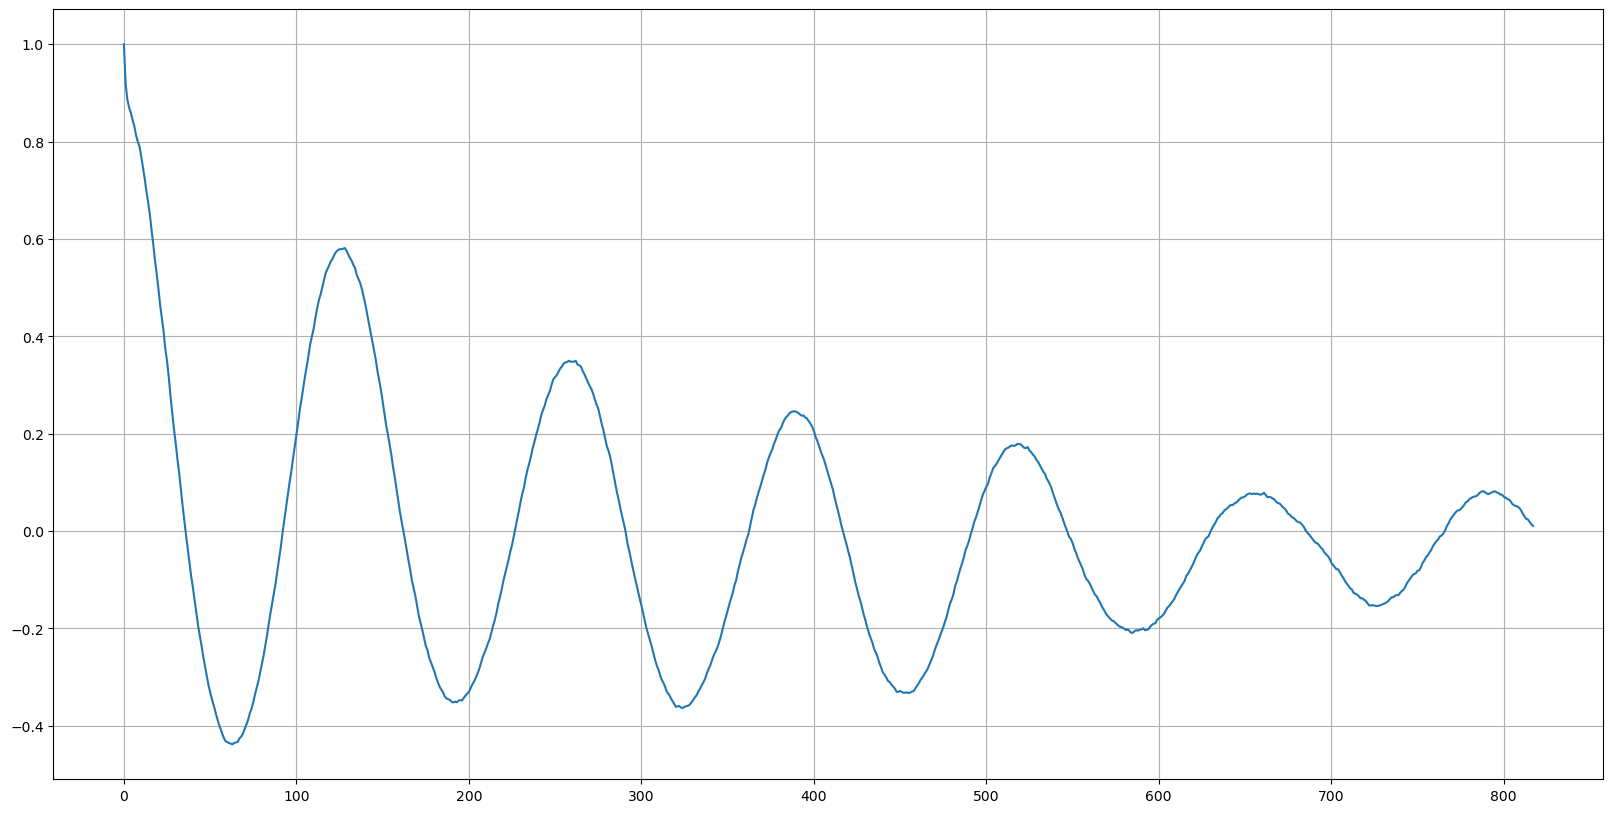

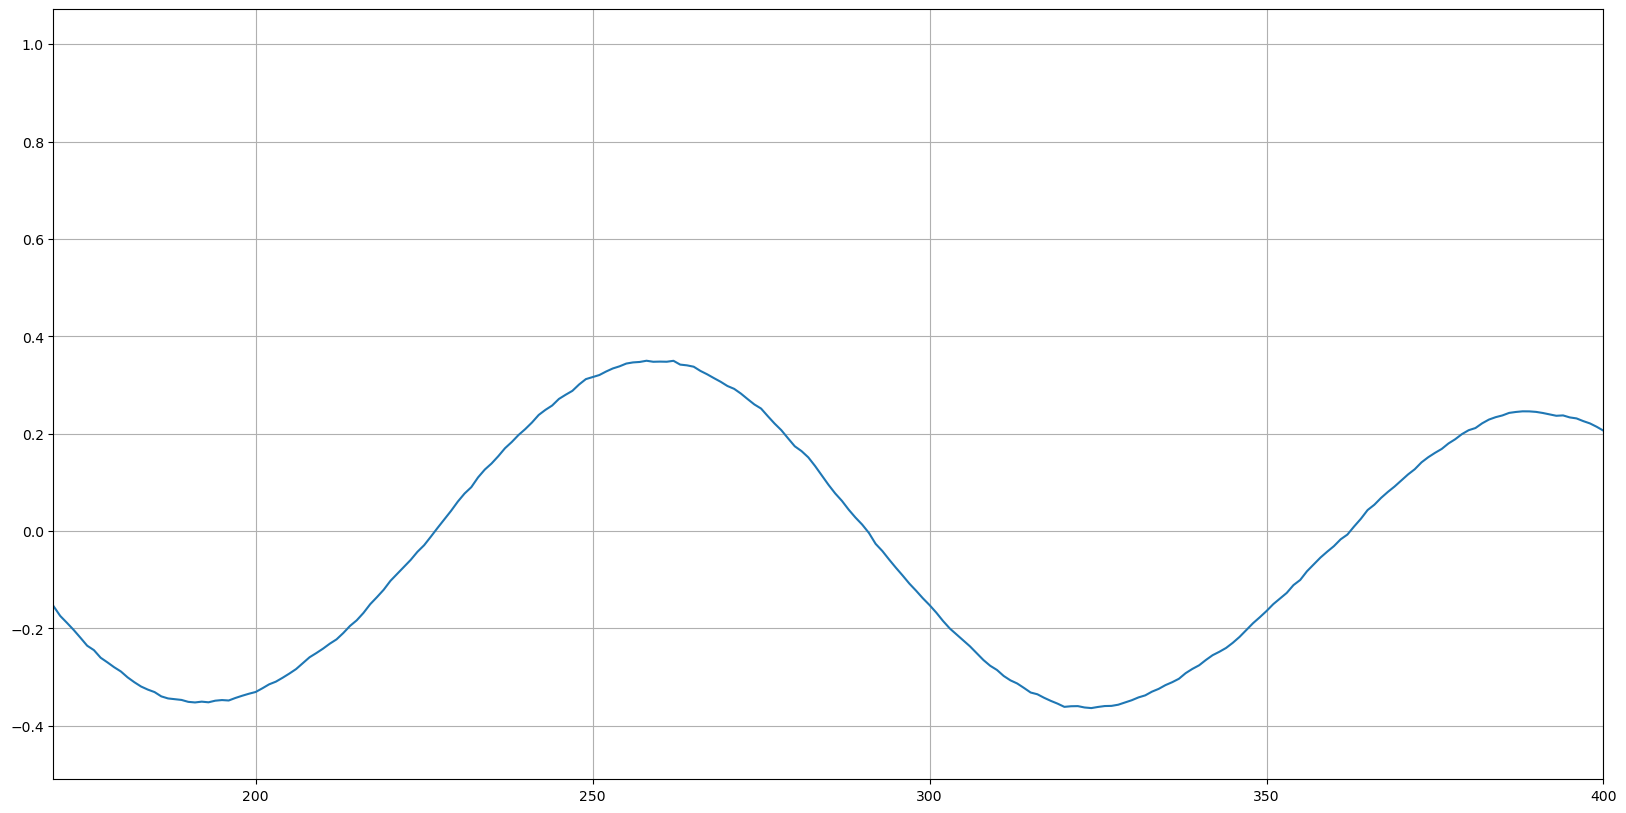

In [23]:
# c).

wanted_lags = [i for i in range(int(np.size(month_numbers)/4))]
plt.plot(autocorrelation_of_given_lags(monthly_sunspot_amount, wanted_lags))
plt.grid()
plt.show()

plt.plot(autocorrelation_of_given_lags(monthly_sunspot_amount, wanted_lags))
plt.xlim(170, 400)
plt.grid()
plt.show()

In [24]:
# d).

# the first high peak seems to be around 260, and the second around 390. the first low point seems to be around 190, 
# and the second around 320.
# thus the period is around 130 months.

# according to wikipedia, the sun has a period of about 11 years (= 132 months), which lines up with the data we see.

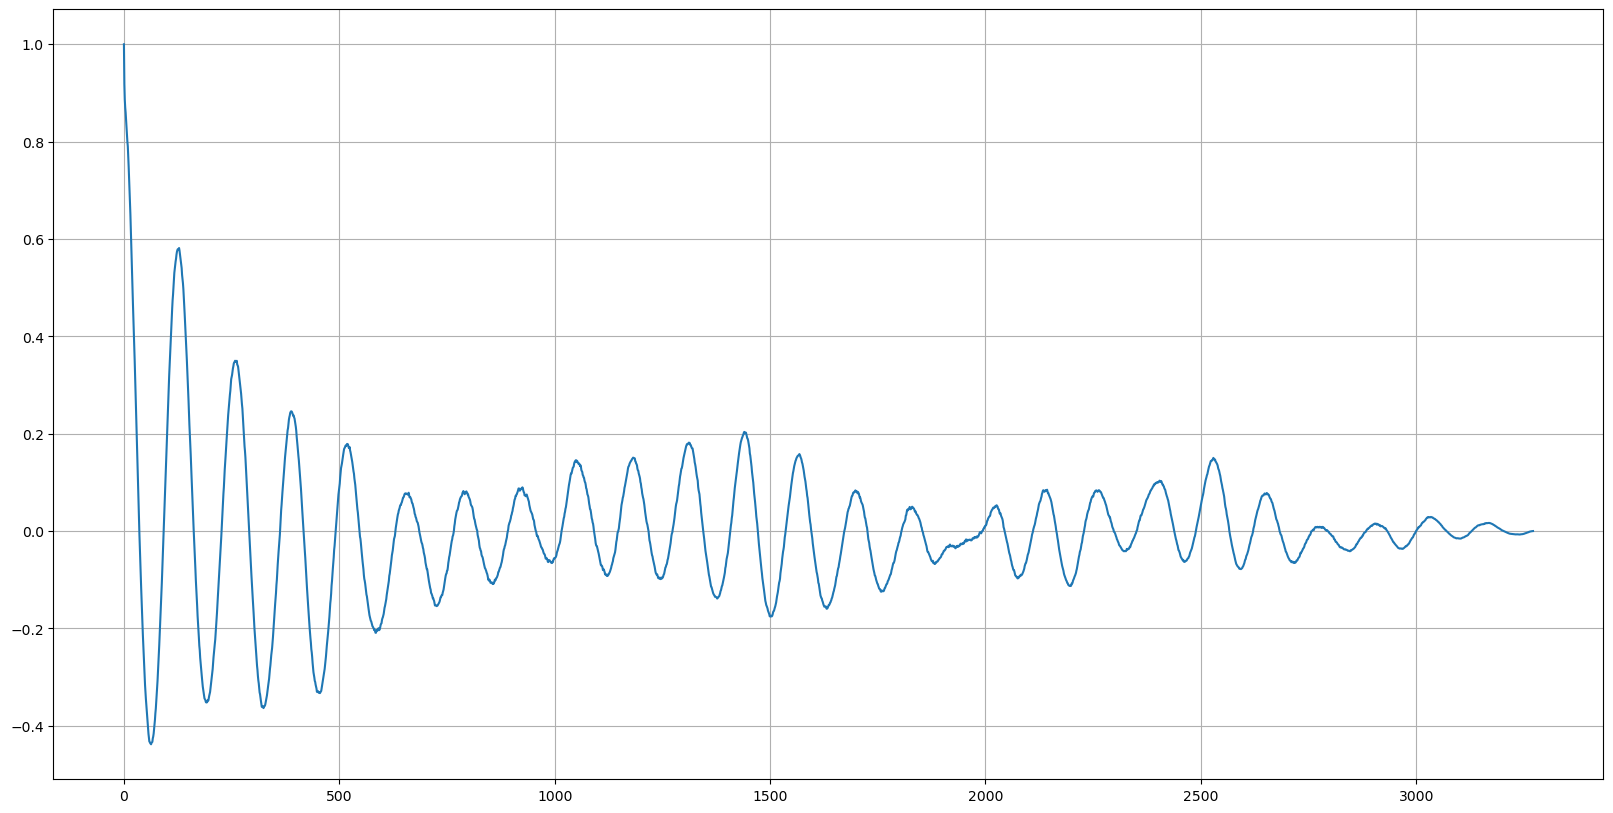

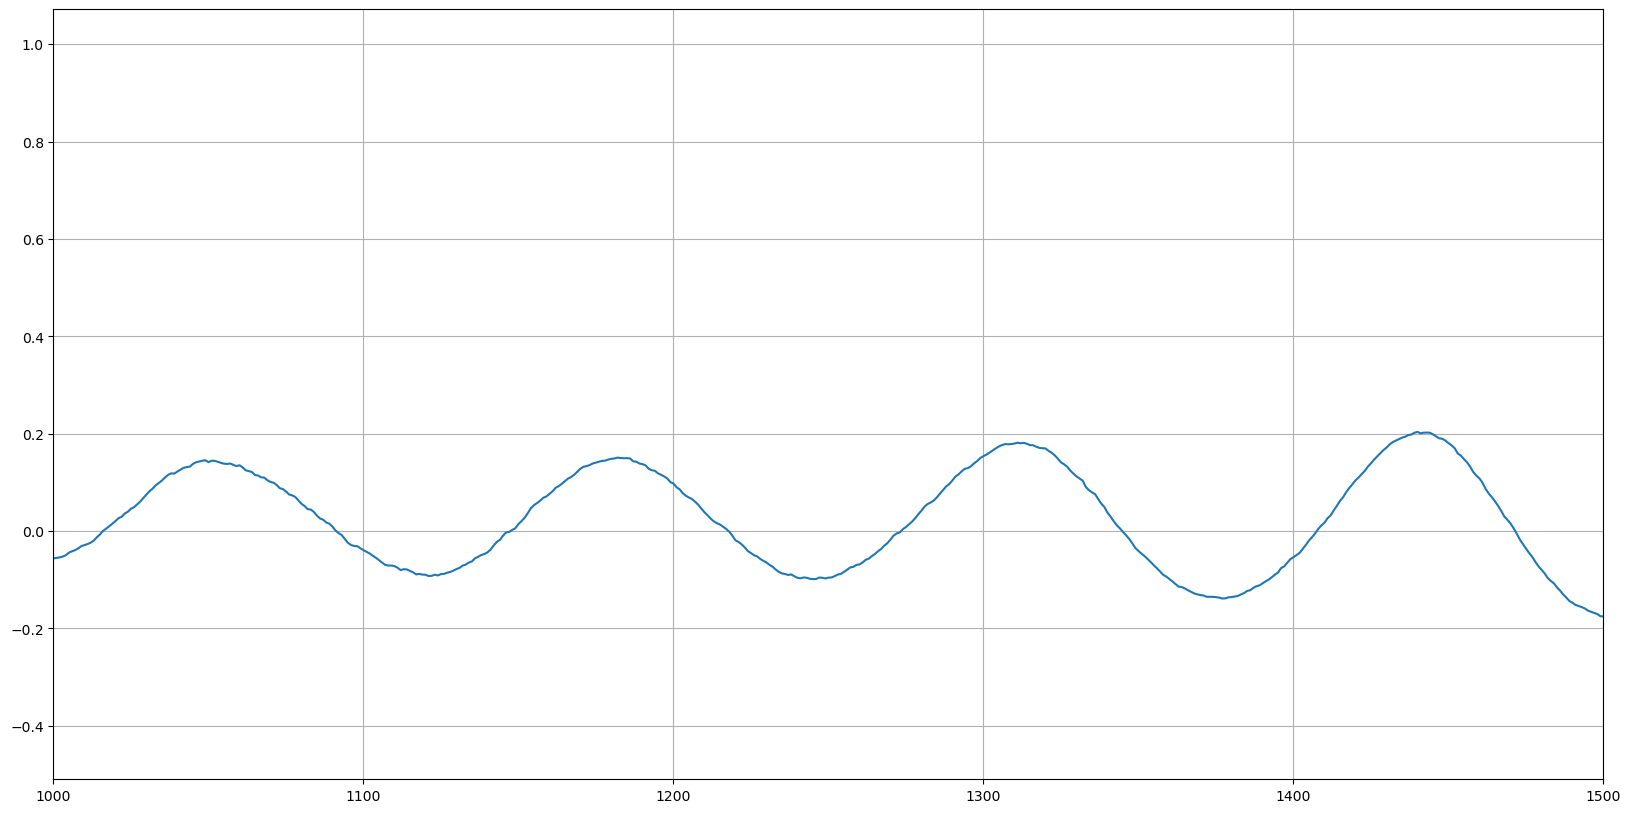

In [27]:
# e).

doubled_month_numbers = np.array([i+1 for i in range(np.size(month_numbers)*2)])
doubled_monthly_amounts = monthly_sunspot_amount + monthly_sunspot_amount

doubled_wanted_lags = [i for i in range(np.size(month_numbers))]
plt.plot(autocorrelation_of_given_lags(doubled_monthly_amounts, doubled_wanted_lags))
plt.grid()
plt.show()

plt.plot(autocorrelation_of_given_lags(doubled_monthly_amounts, doubled_wanted_lags))
plt.xlim(1000, 1500)
plt.grid()
plt.show()

In [28]:
# the period here is also around 90 or so months. 
# yes this result is caused by an artifact, since the amount of months in the original data is across 3272 months, which is not a 
# whole cycle (3272/132 = 24.7878787879).

# Ex. 2: Lag Plot

In [30]:
def normalized_LCG_for_amount(a_func, c_func, m_func, seed, amount=1000):
    func_n = lambda a_func, c_func, m_func, prev_x: ((a_func * prev_x) + c_func) % m_func
    randomized_list_LCG = np.empty(amount)
    randomized_list_LCG[0] = seed

    for i in range(1, amount):
        randomized_list_LCG[i] = func_n(a_func, c_func, m_func, randomized_list_LCG[i-1])
    
    return randomized_list_LCG / m_func

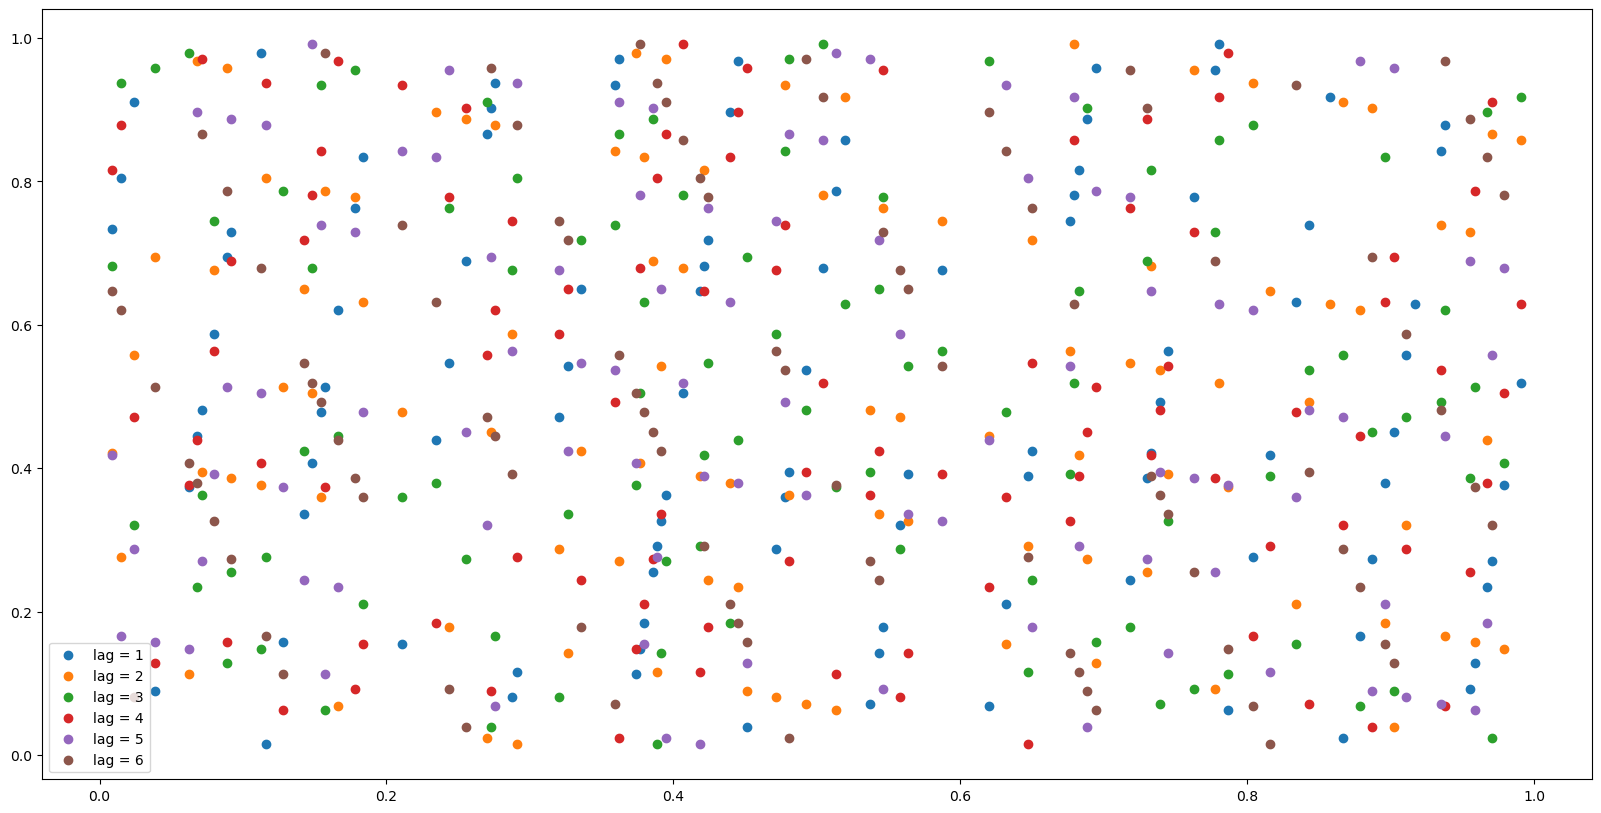

In [43]:
# a).

pseudo_randoms = normalized_LCG_for_amount(12, 211, 337, 3, 100)

for lag in range(1, 7):
    x_values = [0]*(len(pseudo_randoms) - lag)
    y_values = [0]*(len(pseudo_randoms) - lag)

    for i in range(len(x_values)):
        x_values[i] = pseudo_randoms[i]
        y_values[i] = pseudo_randoms[i+lag]
    
    plt.scatter(x_values, y_values, label=f"lag = {lag}")

plt.legend()
plt.show()

In [44]:
# yes, the numbers look random.

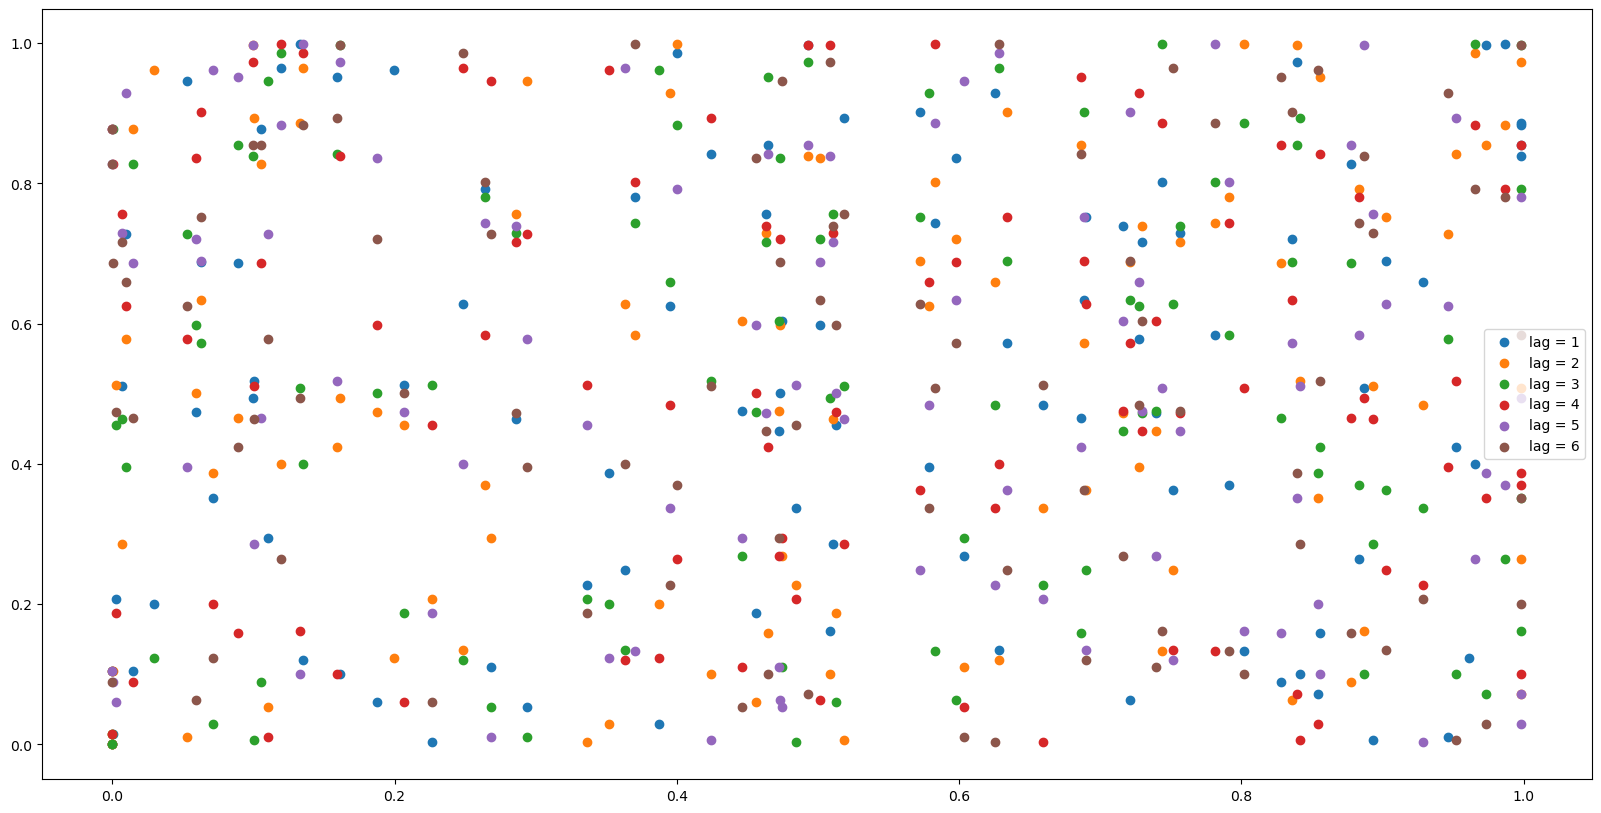

In [45]:
# b).

pseudo_randoms_lermont_lewis = normalized_LCG_for_amount(75, 0, (2**31)-1, 1, 100)

for lag in range(1, 7):
    x_values = [0]*(len(pseudo_randoms_lermont_lewis) - lag)
    y_values = [0]*(len(pseudo_randoms_lermont_lewis) - lag)

    for i in range(len(x_values)):
        x_values[i] = pseudo_randoms_lermont_lewis[i]
        y_values[i] = pseudo_randoms_lermont_lewis[i+lag]
    
    plt.scatter(x_values, y_values, label=f"lag = {lag}")

plt.legend()
plt.show()

In [46]:
# these actually look much less random.

# Ex. 3: Particle Sensor

In [78]:
none_color = np.array([0.0, 0.0, 1.0]) # blue
one_color  = np.array([0.0, 1.0, 0.0]) # green
both_color = np.array([1.0, 0.0, 0.0]) # red

def get_color(sensor_cell): 
    cell1 = sensor_cell[0]
    cell2 = sensor_cell[1]
    exactly_one_chance = (cell1 * (1-cell2)) + ((1-cell1) * cell2)
    exactly_two_chance = (cell1*cell2)
    if (exactly_two_chance > 0.7):
        return both_color
    elif (exactly_one_chance > 0.5):
        return one_color
    else:
        return none_color

[0. 0. 1.]


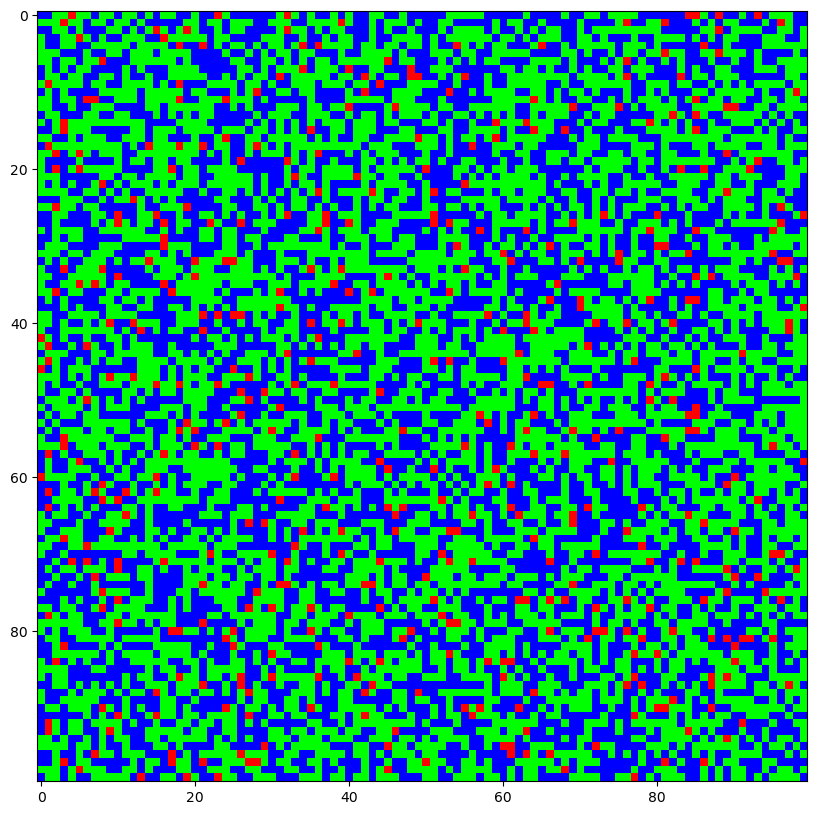

In [79]:
# 1).
sensor = np.random.uniform(0, 1, size=(100, 100, 2))
new_color_matrix = np.array([[get_color(sensor[i][j]) for j in range(100)] for i in range(100)])

print(new_color_matrix[0][0])
plt.imshow(new_color_matrix)
plt.show()

[0. 0. 0.]


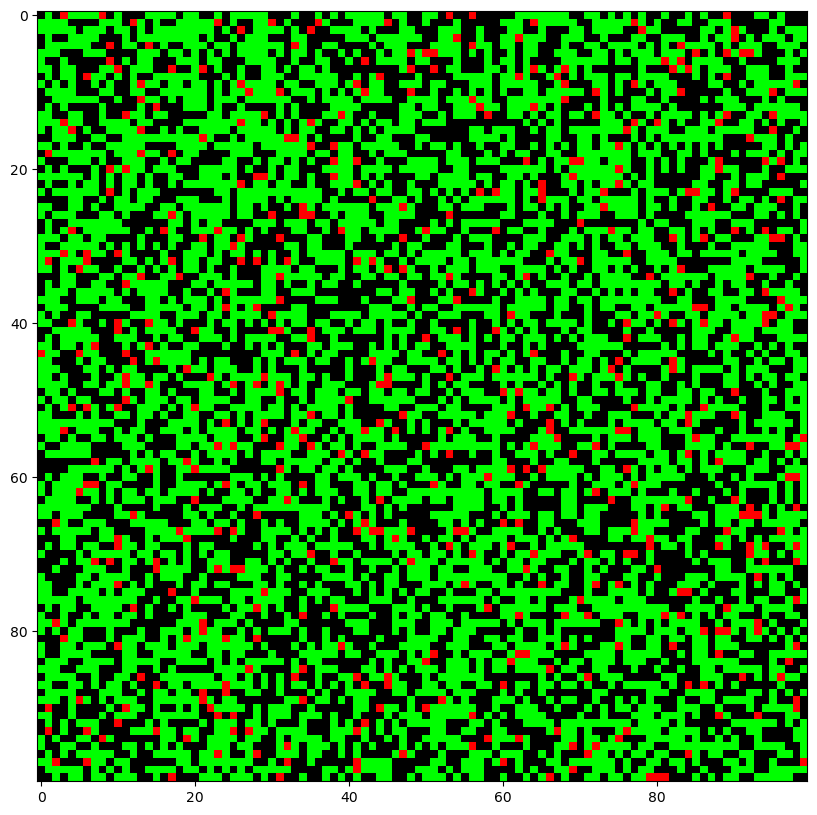

In [80]:
# 2).

none_color = np.array([0.0, 0.0, 0.0]) # black
one_color  = np.array([0.0, 1.0, 0.0]) # green
both_color = np.array([1.0, 0.0, 0.0]) # red

def get_color(sensor_cell): 
    cell1 = sensor_cell[0]
    cell2 = sensor_cell[1]
    exactly_one_chance = (cell1 * (1-cell2)) + ((1-cell1) * cell2)
    exactly_two_chance = (cell1*cell2)
    if (exactly_two_chance > 0.7):
        return both_color
    elif (exactly_one_chance > 0.5):
        return one_color
    else:
        return none_color
    

# 1).
sensor = np.random.uniform(0, 1, size=(100, 100, 2))
new_color_matrix = np.array([[get_color(sensor[i][j]) for j in range(100)] for i in range(100)])

print(new_color_matrix[0][0])
plt.imshow(new_color_matrix)
plt.show()

[0. 0. 1.]


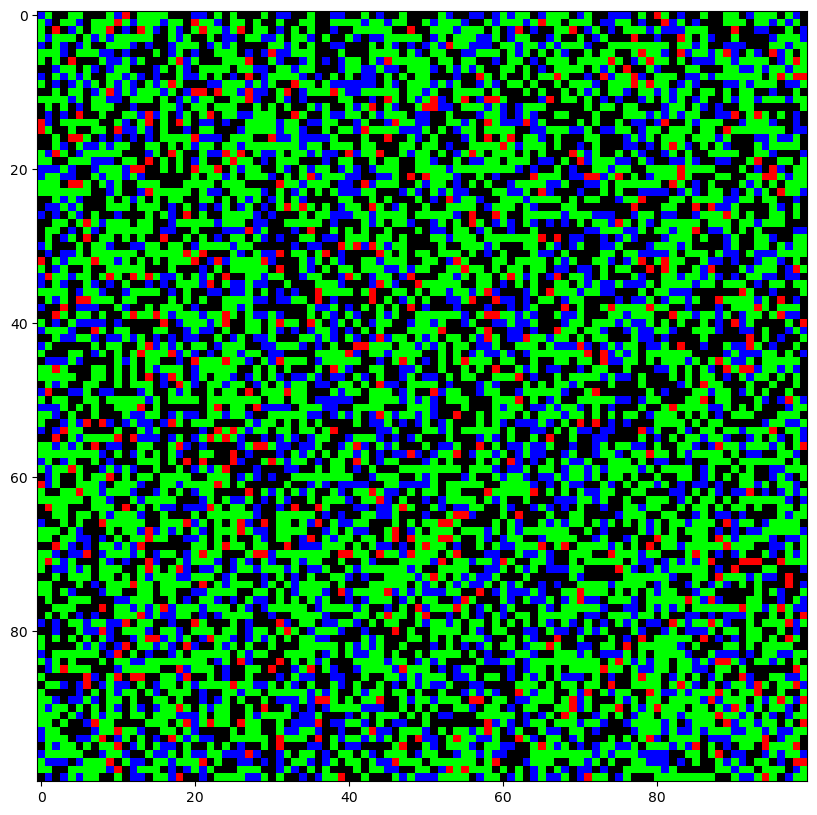

In [81]:
# 3).

default_color = np.array([0.0, 0.0, 0.0]) # black
none_color    = np.array([0.0, 0.0, 1.0]) # blue
one_color     = np.array([0.0, 1.0, 0.0]) # green
both_color    = np.array([1.0, 0.0, 0.0]) # red

def get_color(sensor_cell): 
    cell1 = sensor_cell[0]
    cell2 = sensor_cell[1]
    exactly_one_chance = (cell1 * (1-cell2)) + ((1-cell1) * cell2)
    exactly_two_chance = (cell1*cell2)
    either_chance = exactly_one_chance + exactly_two_chance
    if (either_chance > 0.7):
        if (exactly_two_chance > 0.7):
            return both_color
        elif (exactly_one_chance > 0.5):
            return one_color
        else:
            return none_color
    return default_color
    

# 1).
sensor = np.random.uniform(0, 1, size=(100, 100, 2))
new_color_matrix = np.array([[get_color(sensor[i][j]) for j in range(100)] for i in range(100)])

print(new_color_matrix[0][0])
plt.imshow(new_color_matrix)
plt.show()